<a href="https://colab.research.google.com/github/jacob-torres/housing-the-homeless/blob/main/Jacob_Torres_DS_Build_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing the Homeless
## Investment in Permanent Supportive Housing (PSH) and Change in Homelessness

Homelessness is an unfortunate and difficult problem facing not just the United States, but the entire world. Everywhere on this planet where there are humans, there are humans without homes. It's estimated that there were  567,715 homeless people living in the United States in January 2019. Since 2007, homelessness has been trending upward.[1]

The [HUD Exchange](https://www.hudexchange.info/about/#:~:text=The%20HUD%20Exchange%20is%20an,and%20partners%20of%20these%20organizations) is an online platform for the free and open exchange of data on affordable  housing and homelessness. Organizations involved in housing local homeless people, as well as collecting this data, are funded by the department of housing and urban development (HUD.)

Below are the latest data on the HUD Exchange on homelessness in the United States. This includes the average point-in-time count (PIT) and housing inventory count (HIC) from 2007 to 2019. Each dataset is in excel format.

## Research Question

Does a state's investment in permanent supportive housing (PSH) for the homeless significantly decrease the number of homeless people in that state?

In this analysis, an independent t-test is performed to determine how significant the change in homelessness is based on a state's investment in permanent supportive housing. A result is _significant_ if the p-value falls beneath the significant level of 0.05.

The amount of investment in a certain type of housing project (e.g. permanent housing or emergency shelter) is measured by the number of recorded beds in each category, particularly those that are year-round. In addition, a housing organization's participation in the [Homeless Management Information System](https://www.hudexchange.info/programs/hmis/) (HMIS) may suggest a more standardized approach to targeting homelessness in the area.

## Hypotheses

- Null hypothesis (ho): The amount of investment in permanent supportive housing did _not_ significantly affect the average change in homelessness between 2007 and 2019.
- Alternative hypothesis (ha): The amount of investment in permanent supportive housing _significantly decreased_ the average change in homelessness between 2007 and 2019.

[1]: https://endhomelessness.org/homelessness-in-america/homelessness-statistics/state-of-homelessness-2020/

In [ ]:
# Import libraries
%matplotlib inline
#!pip install geopandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from scipy import stats

# Config Pandas settings
pd.set_option('max_columns', 100)
pd.set_option('max_rows', 100)

In [ ]:
# Function for removing irrelevant features
def drop_irrelevant_features(df):
  new_df = df.copy()
  max_nulls = 0
  sum_nulls = 0
  num_vals = 0

  for col in new_df.columns:
    max_nulls = len(new_df[col]) / 3.0
    sum_nulls = new_df[col].isnull().sum()
    num_vals = len(new_df[col].value_counts())

    if ((sum_nulls > max_nulls) or (num_vals <= 1)):
      new_df = new_df.drop(columns=col)
  
  return new_df
    

# Exploratory Data Analysis
## Point-in-Time (PIT) Count from 2007-2019

The [point-in-time count](https://www.hudexchange.info/programs/hdx/pit-hic/) (PIT) is the number of unsheltered and sheltered homeless people counted on once a year in a given area. The following is a dataframe of the average change in PIT count by state between 2007 and 2019.

In [ ]:
# Load point-in-time (PIT) estimate data from HUD
pit_since_2007_url = 'https://www.huduser.gov/portal/sites/default/files/xls/2007-2019-Point-in-Time-Estimates-by-state.xlsx'
pit_cols = ['State', 'Change from 2018-2019',
            'Change from 2017-2019', 'Change from 2016-2019', 'Change from 2015-2019',
             'Change from 2014-2019', 'Change from 2013-2019', 'Change from 2012-2019',
             'Change from 2011-2019', 'Change from 2010-2019', 'Change from 2009-2019',
             'Change from 2008-2019', 'Change from 2007-2019']

pit_since_2007 = pd.read_excel(
    pit_since_2007_url, names=pit_cols, index_col='State')
pit_since_2007 = drop_irrelevant_features(pit_since_2007)

print(f"PIT count from 2007-2019: {pit_since_2007.shape}")
pit_since_2007.head()

PIT count from 2007-2019: (56, 12)


,Change from 2018-2019,Change from 2017-2019,Change from 2016-2019,Change from 2015-2019,Change from 2014-2019,Change from 2013-2019,Change from 2012-2019,Change from 2011-2019,Change from 2010-2019,Change from 2009-2019,Change from 2008-2019,Change from 2007-2019
State,,,,,,,,,,,,
AK,-0.054067,0.033604,-0.01701,-0.025051,0.0689462,-0.020041,-0.003136,-0.103853,0.0236178,-0.042671,0.158566,0.161389
AL,-0.050379,-0.140258,-0.206762,-0.178589,-0.285025,-0.304543,-0.373968,-0.413278,-0.460635,-0.463651,-0.394654,-0.401871
AR,0.001844,0.101338,0.103126,0.0613281,-0.074591,-0.287251,-0.355244,-0.206484,-0.016293,-0.047335,-0.165284,-0.29171
AZ,0.014394,0.118475,0.0309055,0.0112167,-0.046498,-0.052547,-0.114581,-0.047315,-0.270148,-0.320223,-0.198671,-0.316742
CA,0.163928,0.150123,0.280476,0.307073,0.327559,0.276048,0.259621,0.208986,0.225122,0.22316,0.108012,0.0884406


In [ ]:
pit_since_2007.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, AK to Total
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Change from 2018-2019  56 non-null     float64
 1   Change from 2017-2019  56 non-null     float64
 2   Change from 2016-2019  56 non-null     object 
 3   Change from 2015-2019  56 non-null     object 
 4   Change from 2014-2019  56 non-null     object 
 5   Change from 2013-2019  56 non-null     object 
 6   Change from 2012-2019  56 non-null     object 
 7   Change from 2011-2019  56 non-null     object 
 8   Change from 2010-2019  56 non-null     object 
 9   Change from 2009-2019  56 non-null     object 
 10  Change from 2008-2019  56 non-null     object 
 11  Change from 2007-2019  56 non-null     object 
dtypes: float64(2), object(10)
memory usage: 5.7+ KB


In [ ]:
# Convert spaces to 0
for col in pit_since_2007.columns:
  pit_since_2007[col] = pit_since_2007[col].replace(' ', 0.0)

pit_since_2007.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, AK to Total
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Change from 2018-2019  56 non-null     float64
 1   Change from 2017-2019  56 non-null     float64
 2   Change from 2016-2019  56 non-null     float64
 3   Change from 2015-2019  56 non-null     float64
 4   Change from 2014-2019  56 non-null     float64
 5   Change from 2013-2019  56 non-null     float64
 6   Change from 2012-2019  56 non-null     float64
 7   Change from 2011-2019  56 non-null     float64
 8   Change from 2010-2019  56 non-null     float64
 9   Change from 2009-2019  56 non-null     float64
 10  Change from 2008-2019  56 non-null     float64
 11  Change from 2007-2019  56 non-null     float64
dtypes: float64(12)
memory usage: 5.7+ KB


In [ ]:
pit_since_2007.describe()

,Change from 2018-2019,Change from 2017-2019,Change from 2016-2019,Change from 2015-2019,Change from 2014-2019,Change from 2013-2019,Change from 2012-2019,Change from 2011-2019,Change from 2010-2019,Change from 2009-2019,Change from 2008-2019,Change from 2007-2019
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,-0.012272,-0.006985,-0.071357,-0.111474,-0.141888,-0.170028,-0.192332,-0.184180,-0.191655,-0.175049,-0.139533,-0.146149
std,0.145639,0.263554,0.152813,0.164028,0.179799,0.199950,0.204849,0.208376,0.222452,0.239777,0.276297,0.267202
min,-0.353909,-0.488522,-0.426211,-0.573180,-0.557234,-0.730788,-0.697739,-0.683457,-0.764381,-0.764795,-0.696439,-0.696943
25%,-0.076294,-0.106983,-0.160413,-0.218691,-0.262888,-0.290869,-0.319163,-0.336079,-0.356476,-0.335342,-0.310716,-0.335785
50%,-0.029628,-0.044010,-0.059114,-0.117271,-0.161505,-0.219309,-0.208593,-0.180729,-0.208715,-0.190603,-0.197423,-0.178349
75%,0.027113,0.039532,0.001802,-0.031431,-0.047437,-0.033765,-0.065700,-0.051253,-0.060805,-0.051504,0.006370,0.028407
max,0.730843,1.688988,0.432170,0.307073,0.327559,0.299832,0.323793,0.451509,0.403698,0.508032,0.718480,0.718480


## Housing Inventory Count (HIC) from 2007-2019

The [housing inventory count](https://www.hudexchange.info/programs/hdx/pit-hic/data-reports/) (HIC) is the number of housing projects counted in a given area. The following dataframe shows HIC data by state from 2007 to 2019.

These abbreviations are used to distinguish shelter types in the dataframe:

- ES: Emergency shelter
- TH: Transitional housing
- SH: Safe haven
- PSH: Permanent supportive housing
- RRH: Rapid re-housing
- OPH: Other permanent housing

In [ ]:
# Load housing inventory count (HIC) data from HUD
hic_since_2007_url = 'https://www.huduser.gov/portal/sites/default/files/xls/2007-2019-Housing-Inventory-Count-by-State.xlsx'
hic_since_2007 = pd.read_excel(
    hic_since_2007_url, header=1, index_col='State'
)
hic_since_2007 = drop_irrelevant_features(hic_since_2007)

print(f"HIC from 2007-2019: {hic_since_2007.shape}")
hic_since_2007.head()

HIC from 2007-2019: (56, 73)


,"Total Year-Round Beds (ES, TH, SH)","Total Non-DV Year-Round Beds (ES, TH, SH)","Total HMIS Year-Round Beds (ES, TH, SH)","HMIS Participation Rate for Year-Round Beds (ES, TH, SH)",Total Year-Round Beds (ES),Total Year-Round Beds (TH),Total Year-Round Beds (SH),"Total Units for Households with Children (ES, TH, SH)","Total Beds for Households with Children (ES, TH, SH)","Total Beds for Households without Children (ES, TH, SH)","Total Beds for Households with only Children (ES, TH, SH)","Dedicated Veteran Beds (ES, TH, SH)","Dedicated Youth Beds (ES, TH, SH)",Total Year-Round Beds (ES).1,Total Non-DV Year-Round Beds (ES),Total HMIS Year-Round Beds (ES),HMIS Participation Rate for Year-Round Beds (ES),Total Seasonal Beds (ES),Total Overflow Beds (ES),Total Units for Households with Children (ES),Total Beds for Households with Children (ES),Total Beds for Households without Children (ES),Total Beds for Households with only Children (ES),Dedicated Veteran Beds (ES),Dedicated Youth Beds (ES),Total Year-Round Beds (TH).1,Total Non-DV Year-Round Beds (TH),Total HMIS Year-Round Beds (TH),HMIS Participation Rate for Year-Round Beds (TH),Total Units for Households with Children (TH),Total Beds for Households with Children (TH),Total Beds for Households without Children (TH),Total Beds for Households with only Children (TH),Dedicated Veteran Beds (TH),Dedicated Youth Beds (TH),Total Year-Round Beds (SH).1,Total Non-DV Year-Round Beds (SH),Total HMIS Year-Round Beds (SH),HMIS Participation Rate for Year-Round Beds (SH),Total Beds for Households without Children (SH),Dedicated Veteran Beds (SH),Dedicated Youth Beds (SH),Total Year-Round Beds (RRH),Total Non-DV Year-Round Beds (RRH),Total HMIS Year-Round Beds (RRH),HMIS Participation Rate for Year-Round Beds (RRH),Total Units for Households with Children (RRH),Total Beds for Households with Children (RRH),Total Beds for Households without Children (RRH),Total Beds for Households with only Children (RRH),Dedicated Veteran Beds (RRH),Dedicated Youth Beds (RRH),Total Year-Round Beds (PSH),Total Non-DV Year-Round Beds (PSH),Total HMIS Year-Round Beds (PSH),HMIS Participation Rate for Year-Round Beds (PSH),Total Units for Households with Children (PSH),Total Beds for Households with Children (PSH),Total Beds for Households without Children (PSH),Total Beds for Households with only Children (PSH),Dedicated Veteran Beds (PSH),Dedicated Youth Beds (PSH),Dedicated Chronically Homeless Beds (PSH),Total Year-Round Beds (OPH),Total Non-DV Year-Round Beds (OPH),Total HMIS Year-Round Beds (OPH),HMIS Participation Rate for Year-Round Beds (OPH),Total Units for Households with Children (OPH),Total Beds for Households with Children (OPH),Total Beds for Households without Children (OPH),Total Beds for Households with only Children (OPH),Dedicated Veteran Beds (OPH),Dedicated Youth Beds (OPH)
State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AK,1878,1486,1333,0.7098,1374,504,0,211,677,1169,32,15,160,1374,1063,935,0.6805,194,41,129,420,928,26,0,80,504,423,398,0.7897,82,257,241,6,15,80,0,0,0,.,0,0,0,238,237,237,0.9958,36,135,103,0,25,0,987,987,505,0.5117,94,286,701,0,458,0,423,71,71,71,1,0,0,71,0,0,0
AL,2701,2204,1534,0.5679,1937,730,34,319,982,1669,50,158,138,1937,1587,1088,0.5617,46,46,207,673,1236,28,112,65,730,583,412,0.5644,112,309,399,22,46,73,34,34,34,1,34,0,0,208,208,208,1.0000,47,123,85,0,71,7,3166,3166,1876,0.5925,286,811,2355,0,1323,4,953,8,8,0,0,0,0,8,0,0,0
AR,1917,1324,689,0.3594,1497,420,0,242,808,1085,24,106,78,1497,966,442,0.2953,20,198,187,655,818,24,47,42,420,358,247,0.5881,55,153,267,0,59,36,0,0,0,.,0,0,0,300,300,300,1.0000,35,109,191,0,49,0,1191,1191,637,0.5348,260,485,706,0,538,0,209,0,0,0,.,0,0,0,0,0,0
AZ,6568,5277,4649,0.7078,3787,2713,68,888,3112,3410,46,623,197,3787,2915,2694,0.7114,136,161,426,1636,2113,38,107,79,2713,2294,1887,0.6955,462,1476,1229,8,463,118,68,68,68,1,68,53,0,2512,2447,2510,0.9992,471,1691,821,0,470,71,9238,9238,8094,0.8762,759,2522,6716

### Permanent Supportive Housing (PSH) and PIT Count

In [ ]:
# Subset dataframe by temp shelter types
psh_cols = []

for col in hic_since_2007.columns:
  if col.endswith('(PSH)'):
    psh_cols.append(col)
  
  hic_psh = hic_since_2007[psh_cols]

# Merge psh and pit dataframes
pit_psh = pd.merge(hic_psh, pit_since_2007, on='State')
pit_psh = pit_psh[
                  ['Total Year-Round Beds (PSH)',
                   'HMIS Participation Rate for Year-Round Beds (PSH)',
                   'Change from 2007-2019']
]

for col in pit_psh.columns:
  pit_psh[col] = pit_psh[col].replace('.', 0.0)
  pit_psh[col] = pit_psh[col].replace(' ', 0.0)

  
print(f"Permanent Supportive housing (PSH) and PIT count: {pit_psh.shape}")
pit_psh.head()

Permanent Supportive housing (PSH) and PIT count: (56, 3)


,Total Year-Round Beds (PSH),HMIS Participation Rate for Year-Round Beds (PSH),Change from 2007-2019
State,,,
AK,987,0.5117,0.161389
AL,3166,0.5925,-0.401871
AR,1191,0.5348,-0.291710
AZ,9238,0.8762,-0.316742
CA,65397,0.7385,0.088441


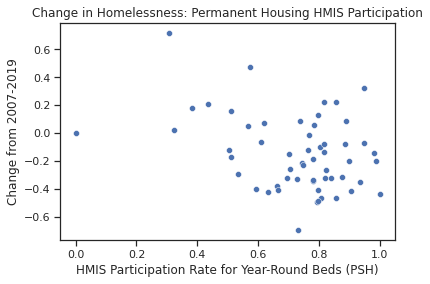

In [ ]:
# Graph   number of PSH beds against change in PIT
sns.set_theme()
sns.set_style('ticks')
sns.despine()
psh_plt = sns.scatterplot(
    x='HMIS Participation Rate for Year-Round Beds (PSH)', y='Change from 2007-2019', data=pit_psh
)
psh_plt.set_title("Change in Homelessness: Permanent Housing HMIS Participation")

plt.show()

# Statistical Experimentation:
## HMIS Participation rate for Permanent Supportive Housing

The statistical test below is an independent (2-sample) t-test, designed to measure the relationship between change in homelessness and HMIS participation for year-round permanent supportive housing (PSH) projects. The independent t-test uses the average change in homelessness in states from two groups: those with a lower HMIS participation rate, and those with a higher participation rate. This means, essentially, that states with more year-round permanent housing shelters 

In [ ]:
# Subset low and high HMIS participation
low_hmis = pit_psh[
                  pit_psh['HMIS Participation Rate for Year-Round Beds (PSH)'] < 0.7
]

print(f"Low HMIS participation (under 70%): {low_hmis.shape}")
display(low_hmis)

Low HMIS participation (under 70%): (18, 3)


,Total Year-Round Beds (PSH),HMIS Participation Rate for Year-Round Beds (PSH),Change from 2007-2019
State,,,
AK,987,0.5117,0.161389
AL,3166,0.5925,-0.401871
AR,1191,0.5348,-0.291710
CO,4862,0.6937,-0.323796
GU,166,0.4337,0.206897
MP,0,0.0000,0.000000
MT,934,0.3822,0.180000
ND,516,0.5058,-0.124214
NH,1131,0.6631,-0.379004


In [ ]:
high_hmis = pit_psh[
                    pit_psh['HMIS Participation Rate for Year-Round Beds (PSH)'] >= 0.7
]

print(f"High HMIS participation (over 70%): {high_hmis.shape}")
display(high_hmis)

High HMIS participation (over 70%): (38, 3)


,Total Year-Round Beds (PSH),HMIS Participation Rate for Year-Round Beds (PSH),Change from 2007-2019
State,,,
AZ,9238,0.8762,-0.316742
CA,65397,0.7385,0.088441
CT,7151,0.8188,-0.323293
DC,7546,0.8569,0.225752
DE,904,0.8153,-0.131951
FL,18547,0.7953,-0.410680
GA,8099,0.8554,-0.468252
HI,3209,0.7847,0.056343
IA,1036,0.7027,-0.153255


In [ ]:
"""Perform 2-sample t-test:
  HMIS participation and change in homelessness
  """

stats.ttest_ind(
    low_hmis['Change from 2007-2019'], high_hmis['Change from 2007-2019']
)

Ttest_indResult(statistic=2.1356385685356827, pvalue=0.03726057556964324)